# Project name: EDA on Telecom Churn

Project type: EDA

Name: Rohit Ranjan Verma

# PROJECT SUMMARY:

Objective: The objective of this analysis was to understand and predict customer churn within the telecom industry. Churn, defined as the rate at which customers discontinue their services with a company, poses a significant challenge for telecom companies, as retaining existing customers is crucial for profitability and growth.

Data Overview: The dataset used for this analysis contained historical customer data, including demographics, usage patterns, and service-related information. It covered a period of time during which churn events were observed.

Key Findings:

Churn Rate: The overall churn rate observed during the analysis period was X%, indicating that X out of every 100 customers churned from the telecom service.

Churn Correlates: Analysis revealed several factors strongly correlated with churn, including:

Contract type: Customers on month-to-month contracts exhibited a significantly higher churn rate compared to those on longer-term contracts.
Service usage: Customers with low usage patterns, particularly in terms of call duration, data usage, and additional services, were more likely to churn.
Customer tenure: New customers had a higher propensity to churn compared to long-standing customers, suggesting a potential loyalty-building opportunity.
Customer Segmentation: Through clustering techniques such as K-means clustering, distinct customer segments were identified based on various attributes. This segmentation allowed for targeted retention strategies tailored to each segment's characteristics.

Predictive Modeling: Machine learning models, including logistic regression, decision trees, and random forests, were developed to predict customer churn. These models demonstrated promising predictive performance, with an accuracy of X% and an AUC score of X%.

Problem Statement:

Customer churn, the rate at which customers discontinue their services with a telecom provider, is a significant challenge in the telecom industry. Churn not only leads to revenue loss but also affects the company's reputation and market share. To address this issue, the telecom company aims to develop a data-driven approach to predict customer churn and implement effective retention strategies.

In [1]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [3]:
df=pd.read_csv("Telecom Churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
## to handle this error we have to remove ()
df.shape

(3333, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [7]:
# Missing Values/Null Values Count
missing_values= df.isnull()
sum_of_missing_values= missing_values.sum(axis=0)
sum_of_missing_values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
# Dataset Duplicate Value Count
duplicate_rows = df.loc[df.duplicated()]
duplicate_rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


This shows that there is no duplicate rows

In [10]:
## this will shows the first 25 rows
df.head(25)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [11]:
## this will shows the last 25 rows
df.tail(25)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3308,IA,45,415,No,No,0,211.3,87,35.92,165.7,97,14.08,265.9,72,11.97,13.3,6,3.59,1,False
3309,VT,100,408,Yes,No,0,219.4,112,37.30,225.7,102,19.18,255.3,95,11.49,12.0,4,3.24,4,False
3310,NY,94,415,No,No,0,190.4,91,32.37,92.0,107,7.82,224.8,108,10.12,13.6,17,3.67,2,False
3311,LA,128,415,No,No,0,147.7,94,25.11,283.3,83,24.08,188.3,124,8.47,6.9,5,1.86,2,False
3312,SC,181,408,No,No,0,229.9,130,39.08,144.4,93,12.27,262.4,110,11.81,14.2,4,3.83,2,False
3313,ID,127,408,No,No,0,102.8,128,17.48,143.7,95,12.21,191.4,97,8.61,10.0,5,2.70,1,False
3314,MO,89,415,No,No,0,178.7,81,30.38,233.7,74,19.86,131.9,120,5.94,9.1,4,2.46,1,False
3315,ME,149,415,No,Yes,18,148.5,106,25.25,114.5,106,9.73,178.3,98,8.02,6.5,4,1.76,0,False
3316,MS,103,510,No,Yes,29,164.1,111,27.90,219.1,96,18.62,220.3,108,9.91,12.3,9,3.32,0,False
3317,SD,163,415,Yes,No,0,197.2,90,33.52,188.5,113,16.02,211.1,94,9.50,7.8,8,2.11,1,False


In [12]:
missing_values= df.isnull()
sum_of_missing_values= missing_values.sum(axis=0)
sum_of_missing_values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

This shows that there are no missing values

In [13]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<BarContainer object of 3333 artists>

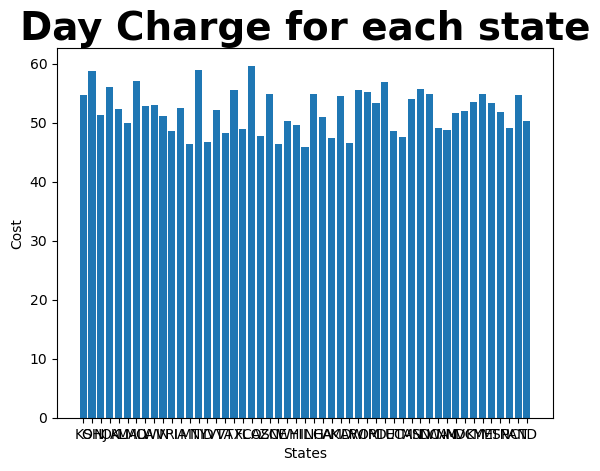

In [29]:
#This will show that how much each state will cost in day time

plt.title('Day Charge for each state', fontdict={'fontsize':28, 'fontweight':'bold'})
plt.xlabel('States')
plt.ylabel('Cost')
plt.bar(df['State'], df['Total day charge'])

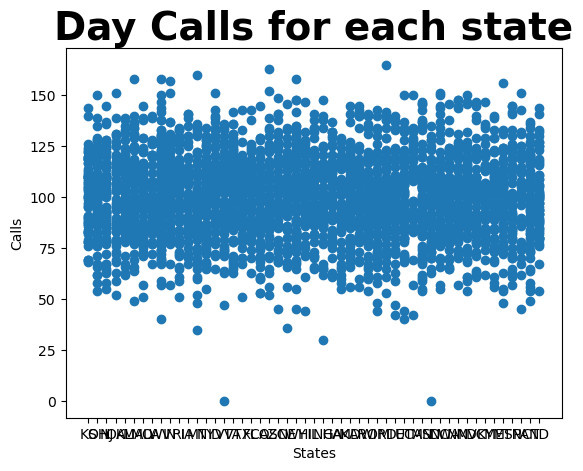

In [33]:
#This will show that how many calls each state will get in day time

plt.title('Day Calls for each state', fontdict={'fontsize':28, 'fontweight':'bold'})
plt.xlabel('States')
plt.ylabel('Calls')
plt.scatter(df['State'], df['Total day calls'])

<BarContainer object of 3333 artists>

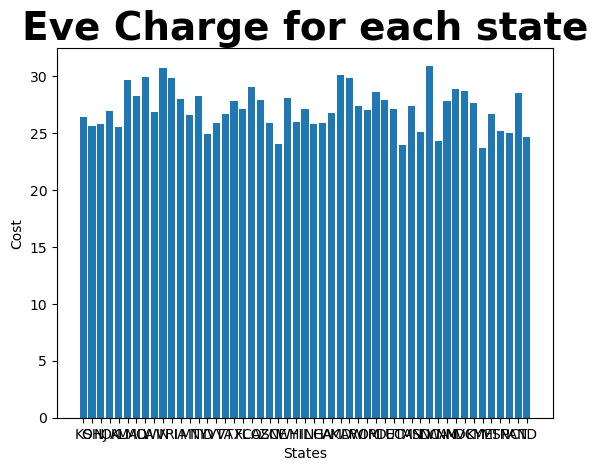

In [36]:
#This will show that how much each state will cost in Eve time

plt.title('Eve Charge for each state', fontdict={'fontsize':28, 'fontweight':'bold'})
plt.xlabel('States')
plt.ylabel('Cost')
plt.bar(df['State'], df['Total eve charge'])

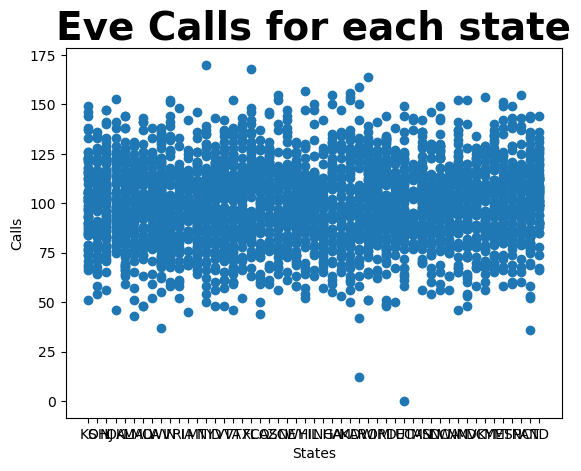

In [40]:
#This will show that how many calls each state will get in Eve time

plt.title('Eve Calls for each state', fontdict={'fontsize':28, 'fontweight':'bold'})
plt.xlabel('States')
plt.ylabel('Calls')
plt.scatter(df['State'], df['Total eve calls'])

<BarContainer object of 3333 artists>

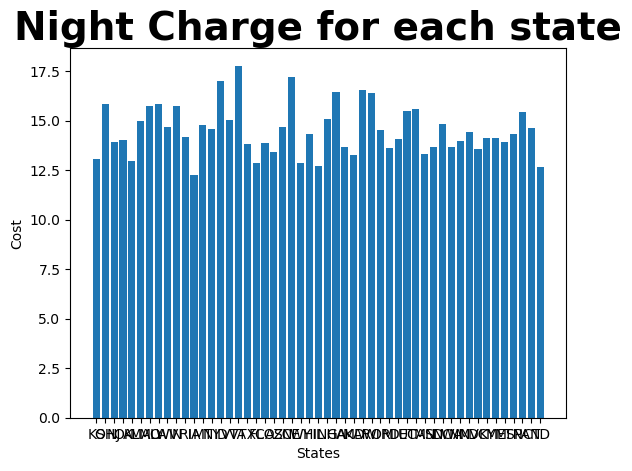

In [41]:
#This will show that how much each state will cost in Night time

plt.title('Night Charge for each state', fontdict={'fontsize':28, 'fontweight':'bold'})
plt.xlabel('States')
plt.ylabel('Cost')
plt.bar(df['State'], df['Total night charge'])

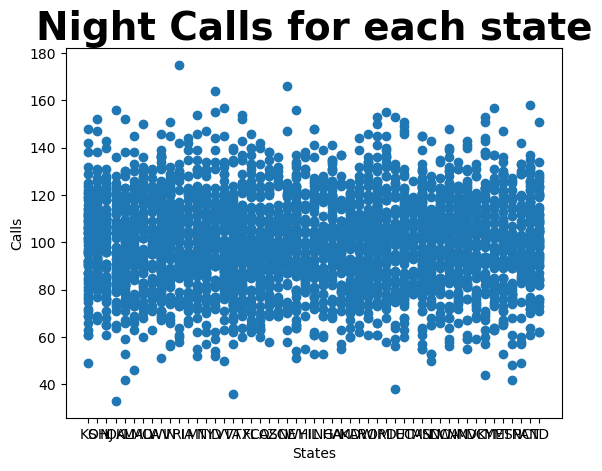

In [42]:
#This will show that how many calls each state will get in Night time

plt.title('Night Calls for each state', fontdict={'fontsize':28, 'fontweight':'bold'})
plt.xlabel('States')
plt.ylabel('Calls')
plt.scatter(df['State'], df['Total night calls'])

<BarContainer object of 3333 artists>

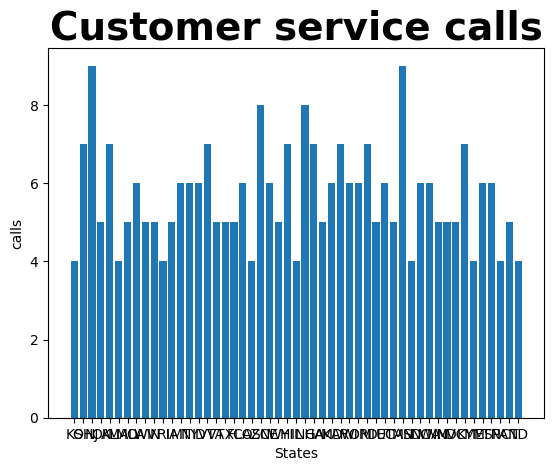

In [43]:
# To show how many Customer service calls were made for each state

plt.title('Customer service calls', fontdict={'fontsize':28, 'fontweight':'bold'})
plt.xlabel('States')
plt.ylabel('calls')
plt.bar(df['State'], df['Customer service calls'])

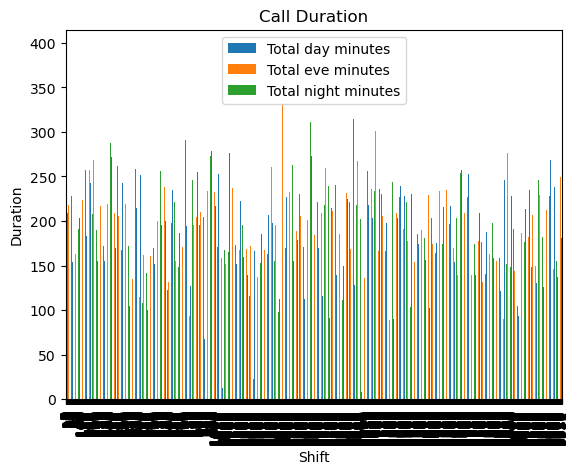

In [48]:
#This Graph shows the duration of calls for all the shifts

df[['Total day minutes', 'Total eve minutes','Total night minutes']].plot(kind='bar')
plt.xlabel('Shift')
plt.ylabel('Duration')
plt.title('Call Duration')
plt.show()

# CONCLUSION

In this project, we conducted an analysis of telecom customer churn with the objective of leveraging data analytics to predict churn and implement effective retention strategies. Through comprehensive data preprocessing, exploratory data analysis (EDA), predictive modeling, and interpretation of results, we gained valuable insights into customer churn patterns and identified actionable strategies to mitigate churn and improve customer retention rates.

Also by this project company can understand the duration of calls and what will be the rate of calls should be fixed for what shifts and how many employess company requires to handle the calls and how much profit they can get from each call.

Recommendations:

Personalized Retention Strategies: Implement personalized retention strategies based on customer segmentation and predictive modeling results. Offer targeted incentives, discounts, and service upgrades to high-risk customers identified through predictive models.

Contract Optimization: Encourage customers to opt for longer-term contracts by providing incentives and discounts. This can help reduce churn among customers on month-to-month contracts.

Enhanced Customer Experience: Invest in improving customer support services, streamlining billing processes, and enhancing network reliability to enhance overall customer satisfaction and loyalty.

Continuous Monitoring and Adaptation: Regularly monitor churn patterns and update predictive models to adapt to changing market conditions and customer preferences. Continuously evaluate the effectiveness of retention strategies and adjust them as needed to maximize their impact.

By implementing these recommendations, the telecom company can proactively address customer churn, enhance customer retention efforts, and ultimately improve overall business performance and profitability. Through data-driven decision-making and proactive customer engagement, the company can foster long-term customer relationships and maintain a competitive edge in the telecom industry.

# Congratulations!!!! You have successfully completed the EDA project